# Analysing Biodiversity in National Parks


# Retrieving and Merging Python data

In [1]:
problem = 'Find which parks or categories have the highest chance of endagerment or extinction \
by analysing the observationd data'
import pandas as pd 
from matplotlib import pyplot as plt 
%matplotlib inline 

observations = pd.read_csv('observations.csv')
species_info = pd.read_csv('species_info.csv')
#time to inspect the data
#print(observations.head())
#print(species_info.head())
# removing duplicates to ensure that one species does not get more observation counts than the other
species_info = species_info.drop_duplicates()
observations = observations.drop_duplicates()
#sorting the species_info so that endangered species are listed first
# and then removing duplicates of species withs same scientific name while ensuring the endangered one is kept
# and then removing duplicate observations for species in the same park
species_info = species_info.sort_values("conservation_status")
species_info = species_info.drop_duplicates(subset = "scientific_name")
observations = observations.drop_duplicates(subset = ["scientific_name","park_name"])
#merging data frames in order to have observation count along with species info in one place
observations_species = pd.merge(species_info,observations)
#removing duplicates 
observation_species = observations_species.drop_duplicates()
observations_species.drop_duplicates(subset = ["scientific_name","park_name"])
#checking result
print(observations_species.head())





         category scientific_name                     common_names  \
0  Vascular Plant   Geum radiatum  Mountain Avens, Spreading Avens   
1  Vascular Plant   Geum radiatum  Mountain Avens, Spreading Avens   
2  Vascular Plant   Geum radiatum  Mountain Avens, Spreading Avens   
3  Vascular Plant   Geum radiatum  Mountain Avens, Spreading Avens   
4          Mammal     Canis lupus                  Gray Wolf, Wolf   

  conservation_status                            park_name  observations  
0          Endangered  Great Smoky Mountains National Park            27  
1          Endangered            Yellowstone National Park            63  
2          Endangered               Yosemite National Park            47  
3          Endangered                  Bryce National Park            25  
4          Endangered               Yosemite National Park            35  


# Looking for endangered species and species of concern

In [2]:
endangered_species = observations_species[observations_species.conservation_status=='Endangered']
species_of_concern = observations_species[observations_species.conservation_status=='Species of Concern']
print(endangered_species.head())
print(species_of_concern.head())

         category scientific_name                     common_names  \
0  Vascular Plant   Geum radiatum  Mountain Avens, Spreading Avens   
1  Vascular Plant   Geum radiatum  Mountain Avens, Spreading Avens   
2  Vascular Plant   Geum radiatum  Mountain Avens, Spreading Avens   
3  Vascular Plant   Geum radiatum  Mountain Avens, Spreading Avens   
4          Mammal     Canis lupus                  Gray Wolf, Wolf   

  conservation_status                            park_name  observations  
0          Endangered  Great Smoky Mountains National Park            27  
1          Endangered            Yellowstone National Park            63  
2          Endangered               Yosemite National Park            47  
3          Endangered                  Bryce National Park            25  
4          Endangered               Yosemite National Park            35  
   category             scientific_name               common_names  \
72     Bird  Coturnicops noveboracensis                Yell

# Factors influencing endangered species

There are many factors that could be influencing the high number of endangered species and potentially causes for it this could 
be the category of the species, or the park where it resides for the observation counts to vary. We will only consider these two
factors as this is the data we have been given. 

# Parks 


In [3]:
#To find how many parks are there and to compare the data so we have the min max and average for all the parks to plot
print(endangered_species.park_name.nunique())
print(endangered_species.park_name.unique())
#therefore there ae 4 parks lets start investingating the first b finding all rows with the park the min, max and mean as well as 
#then finding the rows for the min or max to see which animals these are in case there is a correlation too.

4
['Great Smoky Mountains National Park' 'Yellowstone National Park'
 'Yosemite National Park' 'Bryce National Park']


In [4]:
#yosemite 

endangered_by_park_yosemite = endangered_species[endangered_species.park_name == 'Yosemite National Park']
print(endangered_by_park_yosemite)
min_at_yosemite = endangered_by_park_yosemite.observations.min()
mean_at_yosemite = endangered_by_park_yosemite.observations.mean()
max_at_yosemite = endangered_by_park_yosemite.observations.max()
min_row = endangered_by_park_yosemite[endangered_by_park_yosemite.observations == endangered_by_park_yosemite.observations.min()]
max_row = endangered_by_park_yosemite[endangered_by_park_yosemite.observations == endangered_by_park_yosemite.observations.max()]
print(min_row)
print(max_row)
print(mean_at_yosemite)
print(min_at_yosemite)
print(max_at_yosemite)

          category               scientific_name  \
2   Vascular Plant                 Geum radiatum   
4           Mammal                   Canis lupus   
11            Bird                Grus americana   
13          Mammal       Ovis canadensis sierrae   
16            Bird             Picoides borealis   
21            Bird       Gymnogyps californianus   
27            Fish               Noturus baileyi   
31            Fish          Etheostoma percnurum   
33            Bird           Vermivora bachmanii   
39            Fish             Chasmistes liorus   
42          Mammal  Glaucomys sabrinus coloratus   
44       Amphibian                  Rana sierrae   
49          Mammal                   Canis rufus   
52          Mammal                Myotis sodalis   
58          Mammal             Myotis grisescens   

                                         common_names conservation_status  \
2                     Mountain Avens, Spreading Avens          Endangered   
4            

The average observations of endangered species at Yosemite National Park was roughly 39.07 with
a min and max of 31 and 47. The animal with the least obsevations and that needs to be taken care of is Noturus baileyi(Smoky Madtom) with an observation of only 31 in the park. The animals with the most observations were Geum radiatum(mountain avens) and Gymnogyps californianus(California Condor)

In [5]:
#Yellowstone National park

endangered_by_park_yellowstone = endangered_species[endangered_species.park_name == 'Yellowstone National Park']
print(endangered_by_park_yellowstone)
min_at_yellowstone = endangered_by_park_yellowstone.observations.min()
mean_at_yellowstone = endangered_by_park_yellowstone.observations.mean()
max_at_yellowstone = endangered_by_park_yellowstone.observations.max()
min_row = endangered_by_park_yellowstone[endangered_by_park_yellowstone.observations == endangered_by_park_yellowstone.observations.min()]
max_row = endangered_by_park_yellowstone[endangered_by_park_yellowstone.observations == endangered_by_park_yellowstone.observations.max()]
print(min_row)
print(max_row)
print(mean_at_yellowstone)
print(min_at_yellowstone)
print(max_at_yellowstone)

          category               scientific_name  \
1   Vascular Plant                 Geum radiatum   
7           Mammal                   Canis lupus   
9             Bird                Grus americana   
12          Mammal       Ovis canadensis sierrae   
18            Bird             Picoides borealis   
23            Bird       Gymnogyps californianus   
25            Fish               Noturus baileyi   
28            Fish          Etheostoma percnurum   
34            Bird           Vermivora bachmanii   
37            Fish             Chasmistes liorus   
43          Mammal  Glaucomys sabrinus coloratus   
45       Amphibian                  Rana sierrae   
51          Mammal                   Canis rufus   
55          Mammal                Myotis sodalis   
57          Mammal             Myotis grisescens   

                                         common_names conservation_status  \
1                     Mountain Avens, Spreading Avens          Endangered   
7            

The average observations of endangered species at Yellowstone National Park was roughly was 63.87 
with a min of 57 and a max of 70. The species with the least obsevations and that needs to be taken care of is
Grus americana(whooping crane) with an observation of only 57 in the park. 
The animal with the most observations was Etheostoma percnurum(Duskytail Darter).

In [6]:
#Great Smoky Mountains National Park


endangered_by_park_great_smoky_mountains_national_park = endangered_species[endangered_species.park_name == 'Great Smoky Mountains National Park' ]
print(endangered_by_park_great_smoky_mountains_national_park )
min_at_great_smoky_mountains_national_park  = endangered_by_park_great_smoky_mountains_national_park.observations.min()
mean_at_great_smoky_mountains_national_park  = endangered_by_park_great_smoky_mountains_national_park.observations.mean()
max_at_great_smoky_mountains_national_park = endangered_by_park_great_smoky_mountains_national_park.observations.max()
min_row = endangered_by_park_great_smoky_mountains_national_park [endangered_by_park_great_smoky_mountains_national_park.observations == endangered_by_park_great_smoky_mountains_national_park.observations.min()]
max_row = endangered_by_park_great_smoky_mountains_national_park [endangered_by_park_great_smoky_mountains_national_park.observations == endangered_by_park_great_smoky_mountains_national_park.observations.max()]
print(min_row)
print(max_row)
print(mean_at_great_smoky_mountains_national_park)
print(min_at_great_smoky_mountains_national_park)
print(max_at_great_smoky_mountains_national_park)


          category               scientific_name  \
0   Vascular Plant                 Geum radiatum   
6           Mammal                   Canis lupus   
8             Bird                Grus americana   
15          Mammal       Ovis canadensis sierrae   
17            Bird             Picoides borealis   
22            Bird       Gymnogyps californianus   
24            Fish               Noturus baileyi   
29            Fish          Etheostoma percnurum   
35            Bird           Vermivora bachmanii   
38            Fish             Chasmistes liorus   
41          Mammal  Glaucomys sabrinus coloratus   
47       Amphibian                  Rana sierrae   
50          Mammal                   Canis rufus   
53          Mammal                Myotis sodalis   
59          Mammal             Myotis grisescens   

                                         common_names conservation_status  \
0                     Mountain Avens, Spreading Avens          Endangered   
6            

The average observations of endangered species at great smoky mountains national park was roughly 19.33 
with a min of 11 and a max of 31. The species with the least obsevations and that needs to be taken care of is
Rana sierrae(Sierra Nevada Yellow-Legged Frog) with an observation of only 11 in the park. 
The animal with the most observations was Etheostoma percnurum(Duskytail Darter).

In [7]:
#Bryce National Park

endangered_by_park_bryce_national_park = endangered_species[endangered_species.park_name == 'Bryce National Park' ]
print(endangered_by_park_bryce_national_park )
min_at_bryce_national_park  = endangered_by_park_bryce_national_park.observations.min()
mean_at_bryce_national_park  = endangered_by_park_bryce_national_park.observations.mean()
max_at_bryce_national_park = endangered_by_park_bryce_national_park.observations.max()
min_row = endangered_by_park_bryce_national_park [endangered_by_park_bryce_national_park.observations == endangered_by_park_bryce_national_park.observations.min()]
max_row = endangered_by_park_bryce_national_park [endangered_by_park_bryce_national_park.observations == endangered_by_park_bryce_national_park.observations.max()]
print(min_row)
print(max_row)
print(mean_at_bryce_national_park)
print(min_at_bryce_national_park)
print(max_at_bryce_national_park)



          category               scientific_name  \
3   Vascular Plant                 Geum radiatum   
5           Mammal                   Canis lupus   
10            Bird                Grus americana   
14          Mammal       Ovis canadensis sierrae   
19            Bird             Picoides borealis   
20            Bird       Gymnogyps californianus   
26            Fish               Noturus baileyi   
30            Fish          Etheostoma percnurum   
32            Bird           Vermivora bachmanii   
36            Fish             Chasmistes liorus   
40          Mammal  Glaucomys sabrinus coloratus   
46       Amphibian                  Rana sierrae   
48          Mammal                   Canis rufus   
54          Mammal                Myotis sodalis   
56          Mammal             Myotis grisescens   

                                         common_names conservation_status  \
3                     Mountain Avens, Spreading Avens          Endangered   
5            

The average observations of endangered species at bryce national park was roughly 25.73 
with a min of 20 and a max of 31. The species with the least obsevations and that needs to be taken care of is
Vermivora bachmanii(Bachman's Wood Warbler) with an observation of only 20 in the park. 
The animal with the most observations was  Rana sierrae( Sierra Nevada Yellow-Legged Frog).

# Visualisation of Data

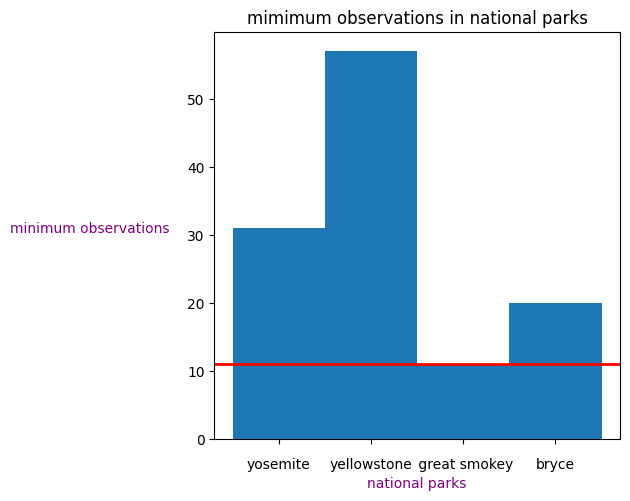

In [8]:
# graph of all parks with minimum observations it is important to see which park has the most vulnerable species
# so that it is better taken care of.
minimum_values = [31,57,11,20]
names = ['yosemite','yellowstone',' great smokey', 'bryce']
plt.bar(x = names, height = minimum_values, width = 1, align = 'center')
plt.xlabel('national parks', color = 'purple')
plt.ylabel('minimum observations',rotation = 360, labelpad = 70, color = 'purple')
plt.axhline(y = 11, xmin = 0, xmax = 1, linewidth = 2, color = 'red')
plt.tight_layout()
plt.title('mimimum observations in national parks')
plt.tick_params(axis = 'x',pad = 10)

As seen from the data the species at the most risk of extinction belongs to the great smokey mountains national park
and is the Rana sierrae(Sierra Nevada Yellow-Legged Frog). This park has the highest chance for speciest extinction for because   the average observation of endangered species was the lowest for this park compared to the others with a value of 19.33.

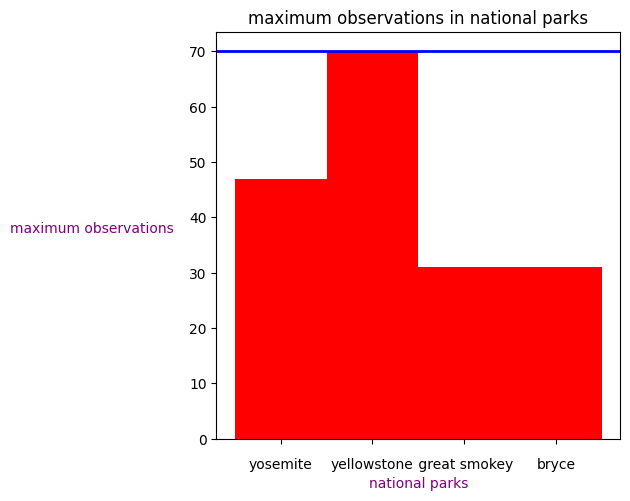

In [9]:
# graph of all parks with minimum observations it is important to see which park has the most vulnerable species
# so that it is better taken care of.
maximum_values = [47,70,31,31]
names = ['yosemite','yellowstone',' great smokey', 'bryce']
plt.bar(x = names, height = maximum_values, width = 1, align = 'center', color = 'red')
plt.xlabel('national parks',color = 'purple')
plt.ylabel('maximum observations',rotation = 360, labelpad = 70, color = 'purple')
plt.axhline(y = 70, xmin = 0, xmax = 1, linewidth = 2, color = 'blue')
plt.tight_layout()
plt.title('maximum observations in national parks')
plt.tick_params(axis = 'x',pad = 10)

As seen from the data the species at the least risk of extinction belongs to yellowstone national park and is  Etheostoma percnurum(Duskytail Darter). Yellowstone park also has the lowest chance of extinction because its average observation for endangered species was 63.87 which was the highest observation average among the rest of the parks.

# Analysis by Category 

         category  observations
0       Amphibian           144
1            Bird           574
2            Fish           455
3          Mammal           885
4  Vascular Plant           162


Text(0.5, 1.0, 'Observations for each category')

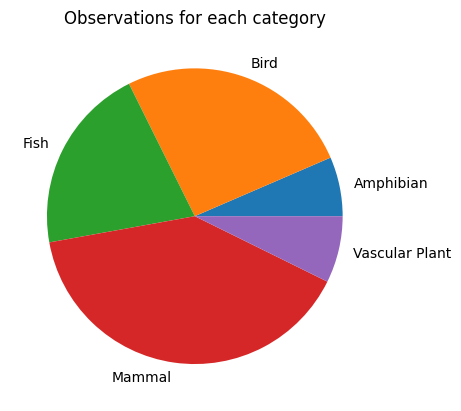

In [10]:
# first we must find how many categories there. Then we compare the data
# to find which category among the endangered species had the most and least observations for each
# park. We will display this chart for in 5 pie plot, 4 for each park and 1 for all parks.
#print(endangered_species.head())
#print(endangered_species.nunique())
#print(endangered_species.category.unique())
#time to organise the data for the pie chart
pie_data = endangered_species.groupby('category',as_index = False).observations.sum()
print(pie_data)
#to check
plt.pie(x = pie_data.observations, labels  = pie_data.category)
plt.title("Observations for each category")



As seen from the data the Amphibian has the least observations and has the highest chance of extinction among all the endangered animals across all the parks.The amphibians need help the most. The Vascular plant is at a close second while the Mammal is the animal with the highest observations and has the lowest chance of extinction.

# Individual Parks


In [11]:
#gathering data for each park.
pie_data = endangered_species.groupby(['park_name','category'],as_index = False).observations.sum()
#inspecting data
#print(pie_data)

Text(0.5, 1.0, 'Observations of each category for yosemite National Park')

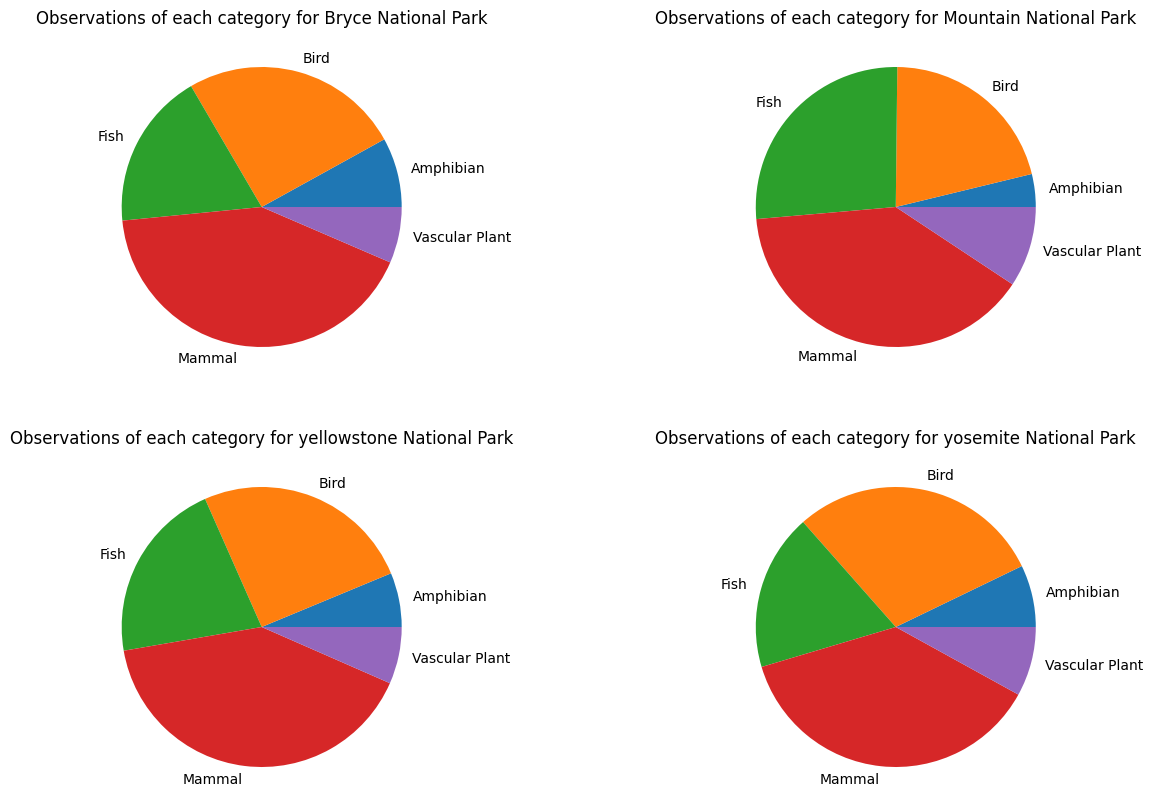

In [12]:
#sorting info for each park 
Bryce = pie_data[pie_data.park_name == 'Bryce National Park']
Mountain = pie_data[pie_data.park_name == 'Great Smoky Mountains National Park']
yellowstone = pie_data[pie_data.park_name == 'Yellowstone National Park']
yosemite = pie_data[pie_data.park_name == 'Yosemite National Park']
#inspecting data
#print(Bryce)
plt.figure(figsize = (15,10))
plt.subplot(2,2,1)
plt.pie(x = Bryce.observations, labels = Bryce.category)
plt.title('Observations of each category for Bryce National Park')

plt.subplot(2,2,2)
plt.pie(x = Mountain.observations, labels = Mountain.category)
plt.title('Observations of each category for Mountain National Park')

plt.subplot(2,2,3)
plt.pie(x = yellowstone.observations, labels = yellowstone.category)
plt.title('Observations of each category for yellowstone National Park')

plt.subplot(2,2,4)
plt.pie(x = yosemite.observations, labels = yosemite.category)
plt.title('Observations of each category for yosemite National Park')






from the data it can be seen the amphibian has the lowest observation for all 4 while the mammal has the highest observation. The amphibians need to be prioritised and need the most help.

# Analysis of Species Conservation Status

In [24]:
#inspecting conservation status data
#print(observations_species.conservation_status.nunique())
#print(observations_species.conservation_status.unique())

Text(0, 0.5, 'Observation')

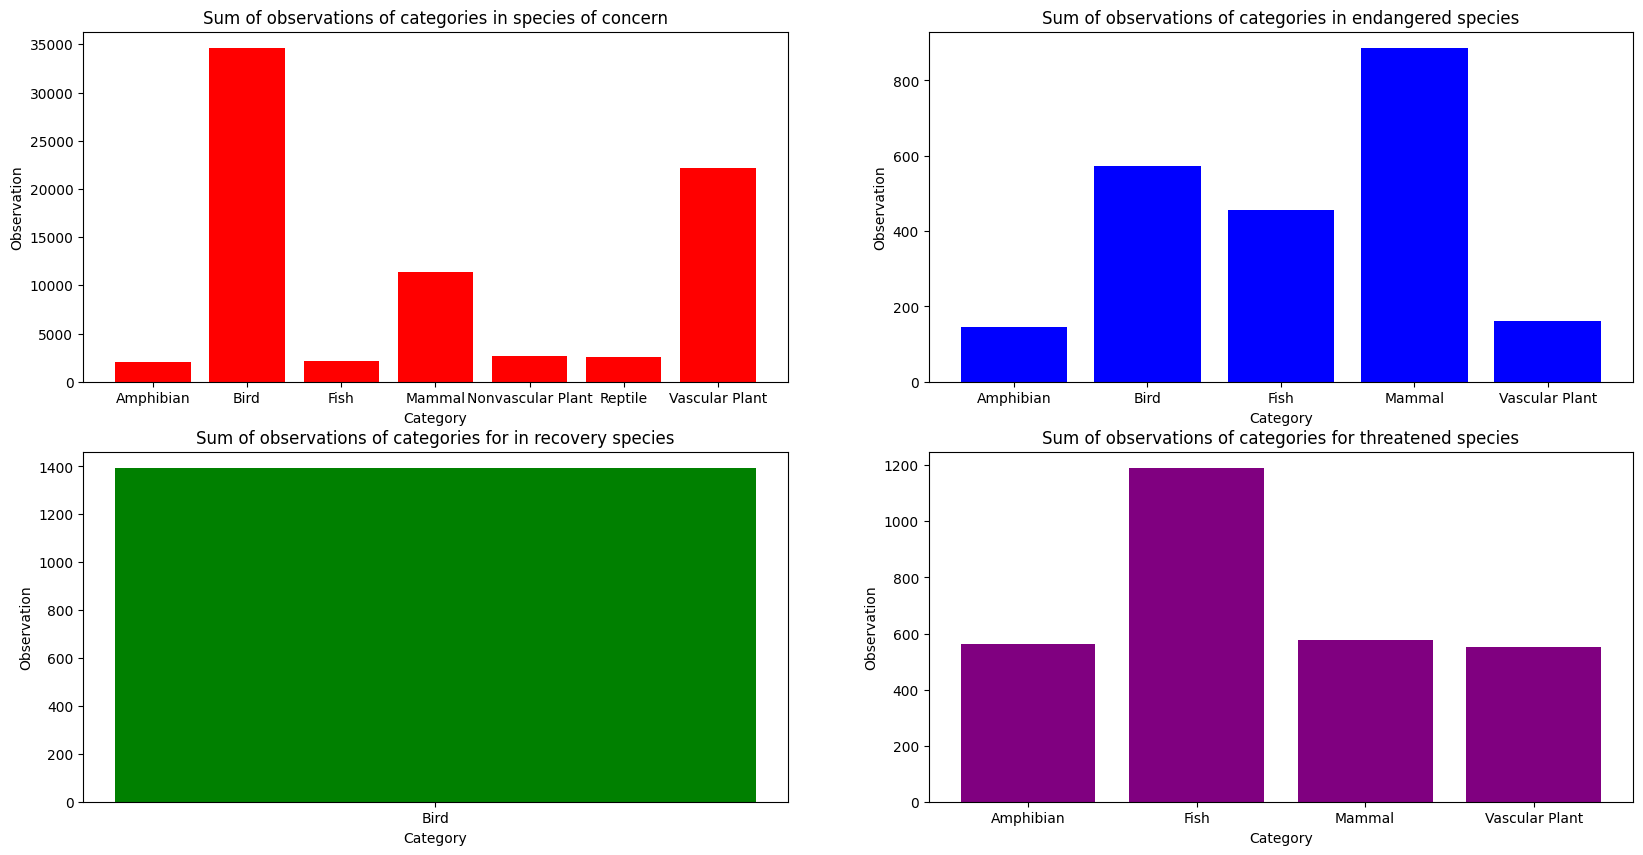

In [30]:
In_recovery = observations_species[observation_species.conservation_status=='In Recovery']
Threatened = observations_species[observation_species.conservation_status=='Threatened']
#sorting groups for categories for each conservations status then plotting it on subplots 
#with titles
plt.figure(figsize = (20,10))
group1 = species_of_concern.groupby('category',as_index = False).observations.sum()
plt.subplot(2,2,1)
plt.bar(x = group1.category, height = group1.observations, color = 'red')
plt.title("Sum of observations of categories in species of concern")
plt.xlabel("Category")
plt.ylabel("Observation")
group2 = endangered_species.groupby('category',as_index = False).observations.sum()
plt.subplot(2,2,2)
plt.bar(x = group2.category, height = group2.observations, color = 'blue')
plt.title("Sum of observations of categories in endangered species")
plt.xlabel("Category")
plt.ylabel("Observation")
group3 = In_recovery.groupby('category',as_index = False).observations.sum()
plt.subplot(2,2,3)
plt.bar(x = group3.category, height = group3.observations, color = 'green')
plt.title("Sum of observations of categories for in recovery species")
plt.xlabel("Category")
plt.ylabel("Observation")
group4 = Threatened.groupby('category',as_index = False).observations.sum()
plt.subplot(2,2,4)
plt.bar(x = group4.category, height = group4.observations, color = 'purple')
plt.title("Sum of observations of categories for threatened species")
plt.xlabel("Category")
plt.ylabel("Observation")


From the data we can see that fish is starting to become less endangered and there is less concern for them. The goal should be too get higher observations for fish. The amphibian and Vascular plant are the most endangered and are are also have the least observations in threatened species meaning they will likely become even more endangered. We can also see that birds have the most recovery and hence more species should be in recovery programs similar to the ones the birds are in as they have very high observation numbers compared to the rest overall. The mammals hace the highest endangered species observation count but this high number of them in this category means there is still lots of time to reverse the damage as there is still a significant amount in the species of concern and threatened species. The Vascular plants and Amphbians are still the lowest category amongst all conservation statuses and need the most attention.